In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import os
import seaborn as sns

# Construct meaningful classes

In [2]:
# construct big classification
big_class = {}
big_class['multiple_object'] = ['EB*', 'EllipVar', 'Symbiotic*','SB*','DQHer', 
                                'Nova-like','EB*betLyr','AMHer','Nova','EB*Algol',
                                'EB*WUMa','CataclyV*',
                                  'DwarfNova','EB*']
big_class['star'] = ['brownD*','SG*','RCrB_Candidate', 'HV*', 'WR*', 'YellowSG*','gammaDor','RotV*alf2CVn',
                     'Erupt*RCrB','BlueStraggler','Eruptive*','V*?', 'Pulsar', 
                     'PulsV*bCep','low-mass*','post-AGB*', 'Pec*','pMS*','HotSubdwarf',
                     'PM*','*inNeb','pulsV*SX','RGB*','HB*','BYDra',
                       'PulsV*RVTau', 'BlueSG*','Irregular_V*','WD*','Ae*','RedSG*',
                     'AGB*','OH/IR','Be*','Cepheid','PulsV*delSct','RotV*','PulsV*',
                       'PulsV*WVir','S*','RSCVn','deltaCep','TTau*','Em*','Orion_V*',
                     'YSO','V*','C*','Mira','LPV*','Star','RRLyr']
big_class['galaxy'] = ['LINER','Blazar','AGN','BLLac','QSO','Galaxy']
big_class['SN'] = ['SNIb-pec', 'SNIb/c','SNII-pec','SN', 'SNIbn','SNIc-BL','SNI',
                   'SNIb','SNIIb','SLSN-II','SNIIP','SLSN-I','SNIc','SNIIn','SNII',
                  'SN Ibn','SN Ic-BL','SN I', 'SN Ib','SN IIb','SN IIP', 'SN Ic','SN IIn',
                   'SN II', 'SN Icn', 'SN Ib/c','SN Ib-pec','SN IIL', 'SN II-pec']
big_class['other_TNS'] = ['Mdwarf', 'LBV','TDE','Other','CV','Varstar', 'M dwarf','LRN',
                          'FRB']
big_class['Ia'] = ['Ia', 'SN Ia', 'SN Ia-91T-like', 'SN Ia-91bg-like', 'SN Ia-CSM', 
                'SN Ia-pec', 'SN Iax[02cx-like]']


# reverse it
class_dict = {}
for key in big_class.keys():
    for item in big_class[key]:
        class_dict[item] = key

# Get data statistics before feature extraction

In [188]:
flist = os.listdir('results_42876/data/raw/')

data = []
for name in flist:
    temp = pd.read_parquet('results_42876/data/raw/' + name)
    data.append(temp)

data2 = pd.concat(data, ignore_index=True)

In [189]:
data2.shape

(2247384, 10)

In [190]:
np.unique(data2['candid'].values).shape

(2181613,)

In [191]:
data3 = data2.drop_duplicates(subset=['candid'], keep=False, 
                              ignore_index=True)

In [192]:
data3.shape

(2117191, 10)

In [177]:
data3.keys()

Index(['objectId', 'candid', 'cjd', 'cmagpsf', 'csigmapsf', 'cfid', 'ra',
       'dec', 'cdsxmatch', 'TNS'],
      dtype='object')

In [178]:
data4 = data3.fillna(-99)

In [ ]:
orig_class = []

for i in range(data3.shape[0]):
    
    found = False
    
    if data4.iloc[i]['cdsxmatch'] != -99:
        obj_type = data4.iloc[i]['cdsxmatch']
    elif data4.iloc[i]['TNS'] != -99:
        obj_type = data4.iloc[i]['TNS']
    else:
        found = True
        
    i = 0
    while not found:
        key = list(big_class.keys())[i]
        
        if obj_type in big_class[key]:
            orig_class.append(key)
            found = True
        else:
            i = i + 1
            
    if not found:
        raise ValueError('Type ' + str(obj_type) + ' not found!')

In [127]:
subset, freq = np.unique(orig_class, return_counts=True)
for i in range(len(subset)):
    print(subset[i], '  ---  ', freq[i], '  ---- ', 100 * freq[i]/len(orig_class))

Ia   ---   6155   ----  0.2907153865664458
SN   ---   3826   ----  0.18071114037420336
galaxy   ---   183054   ----  8.646078695781345
multiple_object   ---   480772   ----  22.708012645056588
other_TNS   ---   903   ----  0.04265085200154355
star   ---   1442481   ----  68.13183128021987


# Check population in original sample after feature extraction

In [3]:
dir_name = '../../data/AL_data/'

fname = 'data/features_42876.csv'
features = pd.read_csv(fname, index_col=False)
features['big_class'] = None

for i in range(features.shape[0]):
    features.loc[i, 'big_class'] = class_dict[features.iloc[i]['type']]

types, freq = np.unique(features['big_class'].values, return_counts=True)
indx = np.argsort(freq)
            
pop = pd.DataFrame()
pop['type'] = types
pop['n'] = freq
pop['perc'] = 100 * np.array(freq)/features.shape[0]

In [4]:
for i in range(pop.shape[0]):
    print(pop.iloc[indx[i]]['type'], '   ---   ', pop.iloc[indx[i]]['n'], '  ---   ', pop.iloc[indx[i]]['perc'])

other_TNS    ---    174   ---    0.4058214385670305
SN    ---    762   ---    1.7772180240694095
Ia    ---    1600   ---    3.7316913891221195
galaxy    ---    4254   ---    9.921634480828436
multiple_object    ---    8636   ---    20.14180427278664
star    ---    27450   ---    64.02183039462636


In [5]:
Ia_labels = [item if item == 'Ia' else 'non_Ia' for item in features['type'].values]

In [6]:
features['Ia_labels'] = Ia_labels

In [7]:
features.keys()

Index(['id', 'type', 'a_g', 'b_g', 'c_g', 'snratio_g', 'chisq_g', 'nrise_g',
       'a_r', 'b_r', 'c_r', 'snratio_r', 'chisq_r', 'nrise_r', 'big_class',
       'Ia_labels'],
      dtype='object')

In [8]:
features2 = features.sample(n=5000, replace=False)

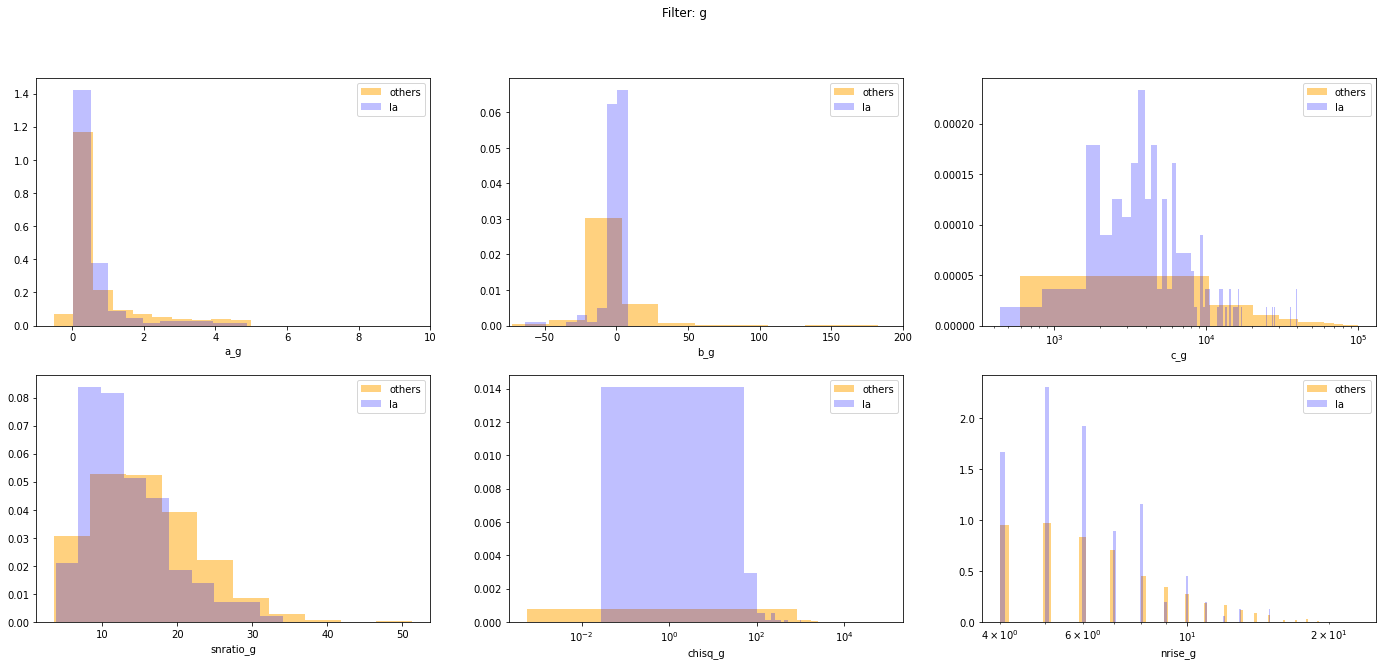

In [199]:
flag1 = np.logical_and(features2['a_g'] > -1, features2['a_g']< 5)
flag2 = np.logical_and(features2['b_g'] >-75, features2['b_g'] < 200)
flag3 = np.logical_and(features2['c_g']<10**5, flag2)
flag4 = np.logical_and(features2['chisq_g']<10**5, flag3)
flag = np.logical_and(flag1, flag4)

type_flag = features2[flag]['Ia_labels'].values == 'Ia'


plt.figure(figsize=(24,10))
plt.suptitle('Filter: g')

plt.subplot(2,3,1)
plt.hist(features2[flag][~type_flag]['a_g'], bins=10, label='others', density=True, alpha=0.5, color='orange')
plt.hist(features2[flag][type_flag]['a_g'], bins=10, label='Ia', alpha=0.25, density=True, color='blue')
plt.xlim(-1,10)
plt.xlabel('a_g')
plt.legend()

plt.subplot(2,3,2)
plt.hist(features2[flag][~type_flag]['b_g'],  bins=10, label='others', density=True, alpha=0.5, color='orange')
plt.hist(features2[flag][type_flag]['b_g'], bins=10, label='Ia', alpha=0.25, density=True, color='blue')
plt.xlim(-75,200)
plt.xlabel('b_g')
plt.legend()

plt.subplot(2,3,3)
plt.hist(features2[flag][~type_flag]['c_g'],label='others', alpha=0.5, color='orange', density=True)
plt.hist(features2[flag][type_flag]['c_g'],  label='Ia', alpha=0.25,  color='blue', density=True, bins=100)
#plt.xlim(-75,200)
plt.xlabel('c_g')
plt.legend()
plt.xscale('log')

plt.subplot(2,3,4)
plt.hist(features2[flag][~type_flag]['snratio_g'],  bins=10, label='others', density=True, alpha=0.5, color='orange')
plt.hist(features2[flag][type_flag]['snratio_g'], bins=10, label='Ia', alpha=0.25, density=True, color='blue')
#plt.xlim(-75,200)
plt.xlabel('snratio_g')
plt.legend()

plt.subplot(2,3,5)
plt.hist(features2[flag][~type_flag]['chisq_g'],  bins=100, label='others', density=True, alpha=0.5, color='orange')
plt.hist(features2[flag][type_flag]['chisq_g'], bins=100, label='Ia', alpha=0.25, density=True, color='blue')
#plt.xlim(-75,200)
plt.xlabel('chisq_g')
plt.legend()
plt.xscale('log')

plt.subplot(2,3,6)
plt.hist(features2[flag][~type_flag]['nrise_g'],  bins=100, label='others', density=True, alpha=0.5, color='orange')
plt.hist(features2[flag][type_flag]['nrise_g'], bins=100, label='Ia', alpha=0.25, density=True, color='blue')
#plt.xlim(-75,200)
plt.xlabel('nrise_g')
plt.legend()
plt.xscale('log')

plt.show()

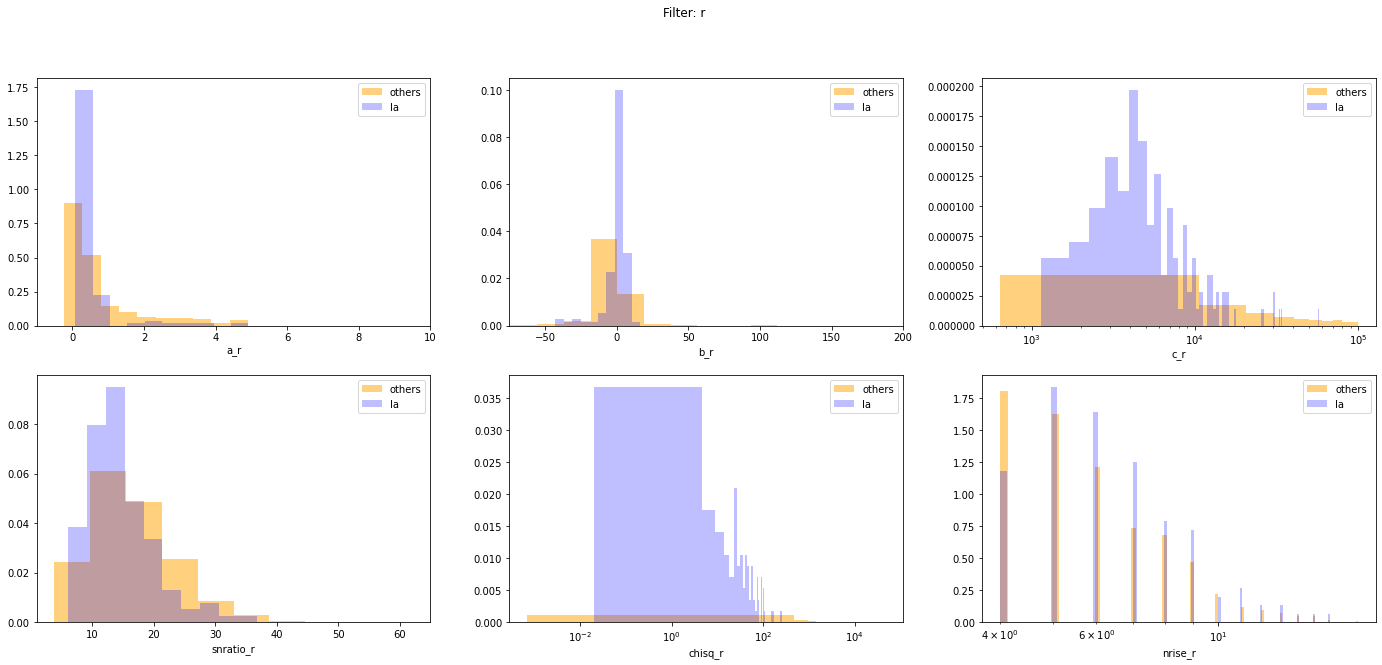

In [200]:
flag1x = np.logical_and(features2['a_r'] > -1, features2['a_r']< 5)
flag2x = np.logical_and(features2['b_r'] >-75, features2['b_r'] < 200)
flag3x = np.logical_and(features2['c_r']<10**5, flag2x)
flag4x = np.logical_and(features2['chisq_r']<10**5, flag3x)
flag5x = np.logical_and(flag1x, flag4x)
flagx = np.logical_and(flag5x, flag)

type_flagx = features2[flagx]['Ia_labels'].values == 'Ia'


plt.figure(figsize=(24,10))
plt.suptitle('Filter: r')

plt.subplot(2,3,1)
plt.hist(features2[flagx][~type_flagx]['a_r'], bins=10, label='others', density=True, alpha=0.5, color='orange')
plt.hist(features2[flagx][type_flagx]['a_r'], bins=10, label='Ia', alpha=0.25, density=True, color='blue')
plt.xlim(-1,10)
plt.xlabel('a_r')
plt.legend()

plt.subplot(2,3,2)
plt.hist(features2[flagx][~type_flagx]['b_r'],  bins=10, label='others', density=True, alpha=0.5, color='orange')
plt.hist(features2[flagx][type_flagx]['b_r'], bins=10, label='Ia', alpha=0.25, density=True, color='blue')
plt.xlim(-75,200)
plt.xlabel('b_r')
plt.legend()

plt.subplot(2,3,3)
plt.hist(features2[flagx][~type_flagx]['c_r'],label='others', alpha=0.5, color='orange', density=True)
plt.hist(features2[flagx][type_flagx]['c_r'],  label='Ia', alpha=0.25,  color='blue', density=True, bins=100)
#plt.xlim(-75,200)
plt.xlabel('c_r')
plt.legend()
plt.xscale('log')

plt.subplot(2,3,4)
plt.hist(features2[flagx][~type_flagx]['snratio_r'],  bins=10, label='others', density=True, alpha=0.5, color='orange')
plt.hist(features2[flagx][type_flagx]['snratio_r'], bins=10, label='Ia', alpha=0.25, density=True, color='blue')
#plt.xlim(-75,200)
plt.xlabel('snratio_r')
plt.legend()

plt.subplot(2,3,5)
plt.hist(features2[flagx][~type_flagx]['chisq_r'],  bins=100, label='others', density=True, alpha=0.5, color='orange')
plt.hist(features2[flagx][type_flagx]['chisq_r'], bins=100, label='Ia', alpha=0.25, density=True, color='blue')
#plt.xlim(-75,200)
plt.xlabel('chisq_r')
plt.legend()
plt.xscale('log')

plt.subplot(2,3,6)
plt.hist(features2[flagx][~type_flagx]['nrise_r'],  bins=100, label='others', density=True, alpha=0.5, color='orange')
plt.hist(features2[flagx][type_flagx]['nrise_r'], bins=100, label='Ia', alpha=0.25, density=True, color='blue')
#plt.xlim(-75,200)
plt.xlabel('nrise_r')
plt.legend()
plt.xscale('log')

plt.show()

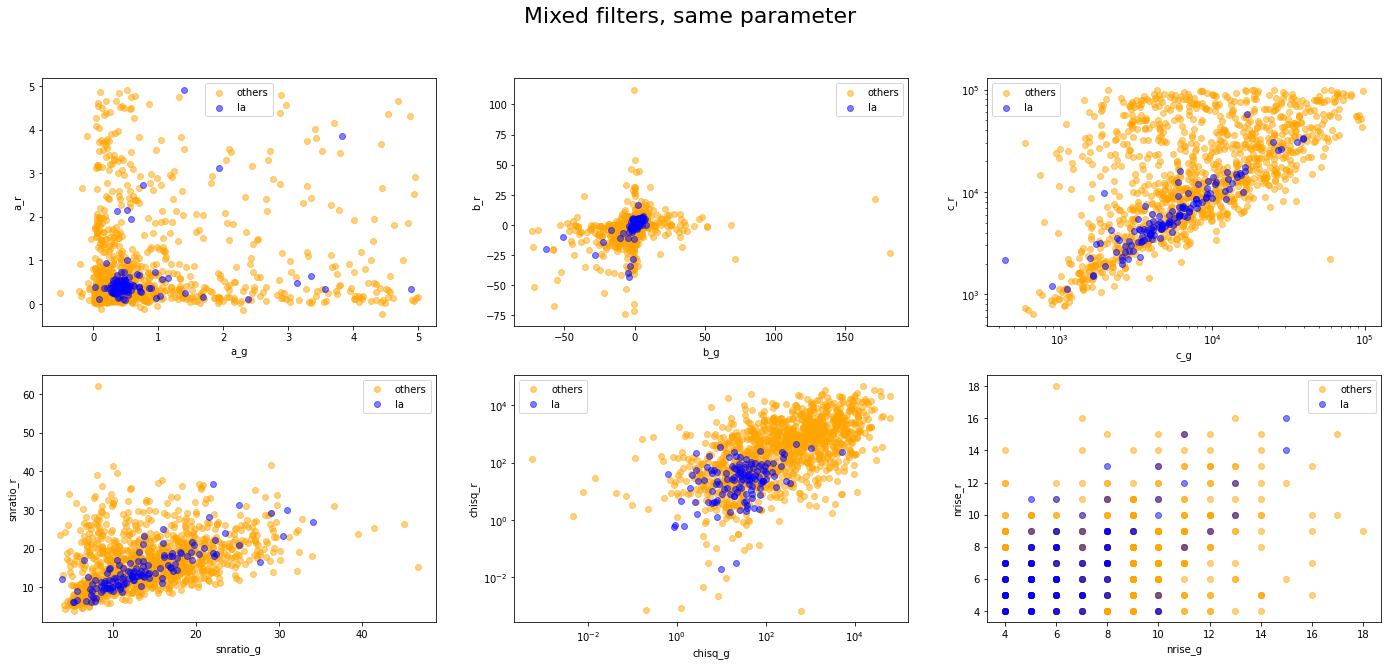

In [201]:
plt.figure(figsize=(24,10))
plt.suptitle('Mixed filters, same parameter', fontsize=22)

plt.subplot(2,3,1)
plt.scatter(features2[flagx][~type_flagx]['a_g'], features2[flagx][~type_flagx]['a_r'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['a_g'], features2[flagx][type_flagx]['a_r'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('a_g')
plt.ylabel('a_r')
plt.legend()

plt.subplot(2,3,2)
plt.scatter(features2[flagx][~type_flagx]['b_g'], features2[flagx][~type_flagx]['b_r'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['b_g'], features2[flagx][type_flagx]['b_r'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('b_g')
plt.ylabel('b_r')
plt.legend()



plt.subplot(2,3,3)
plt.scatter(features2[flagx][~type_flagx]['c_g'], features2[flagx][~type_flagx]['c_r'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['c_g'], features2[flagx][type_flagx]['c_r'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('c_g')
plt.ylabel('c_r')
plt.legend()
plt.xscale('log')
plt.yscale('log')

plt.subplot(2,3,4)
plt.scatter(features2[flagx][~type_flagx]['snratio_g'], features2[flagx][~type_flagx]['snratio_r'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['snratio_g'], features2[flagx][type_flagx]['snratio_r'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('snratio_g')
plt.ylabel('snratio_r')
plt.legend()

plt.subplot(2,3,5)
plt.scatter(features2[flagx][~type_flagx]['chisq_g'], features2[flagx][~type_flagx]['chisq_r'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['chisq_g'], features2[flagx][type_flagx]['chisq_r'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('chisq_g')
plt.ylabel('chisq_r')
plt.legend()
plt.yscale('log')
plt.xscale('log')

plt.subplot(2,3,6)
plt.scatter(features2[flagx][~type_flagx]['nrise_g'], features2[flagx][~type_flagx]['nrise_r'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['nrise_g'], features2[flagx][type_flagx]['nrise_r'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('nrise_g')
plt.ylabel('nrise_r')
plt.legend()


plt.show()


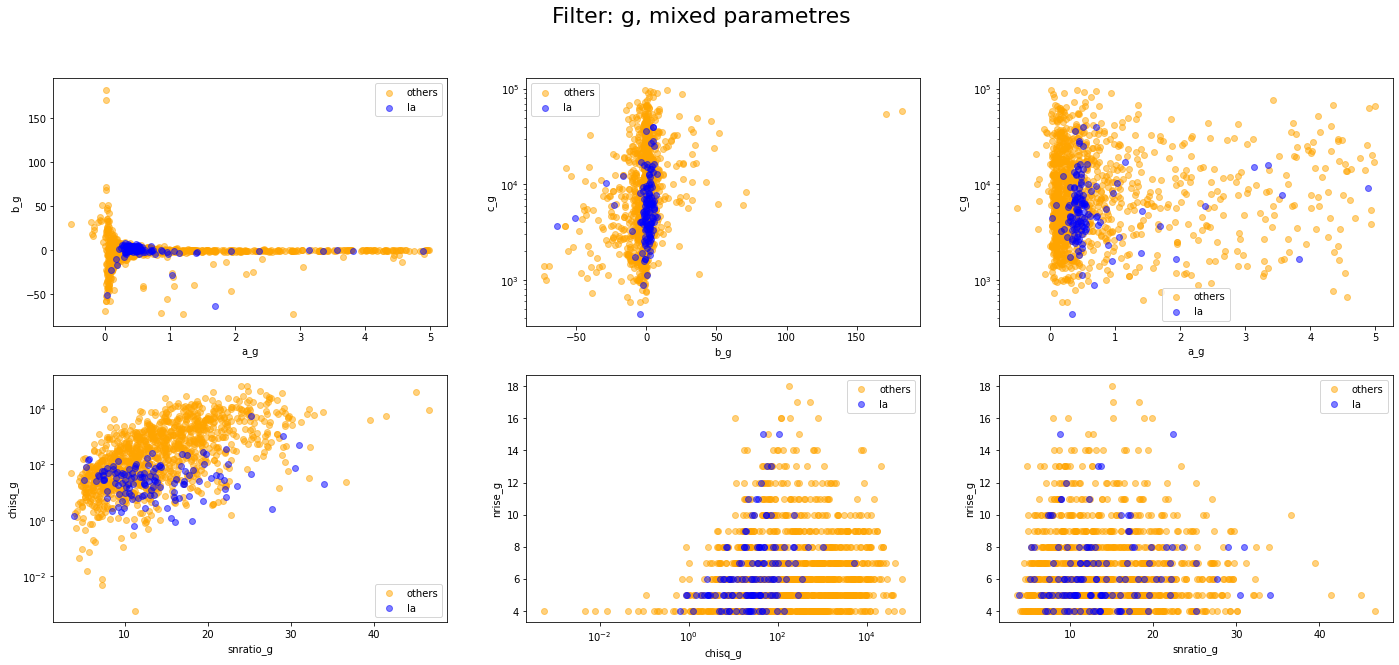

In [202]:
plt.figure(figsize=(24,10))
plt.suptitle('Filter: g, mixed parametres', fontsize=22)

plt.subplot(2,3,1)
plt.scatter(features2[flagx][~type_flagx]['a_g'], features2[flagx][~type_flagx]['b_g'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['a_g'], features2[flagx][type_flagx]['b_g'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('a_g')
plt.ylabel('b_g')
plt.legend()

plt.subplot(2,3,2)
plt.scatter(features2[flagx][~type_flagx]['b_g'], features2[flagx][~type_flagx]['c_g'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['b_g'], features2[flagx][type_flagx]['c_g'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('b_g')
plt.ylabel('c_g')
plt.yscale('log')
plt.legend()



plt.subplot(2,3,3)
plt.scatter(features2[flagx][~type_flagx]['a_g'], features2[flagx][~type_flagx]['c_g'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['a_g'], features2[flagx][type_flagx]['c_g'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('a_g')
plt.ylabel('c_g')
plt.legend()
plt.yscale('log')

plt.subplot(2,3,4)
plt.scatter(features2[flagx][~type_flagx]['snratio_g'], features2[flagx][~type_flagx]['chisq_g'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['snratio_g'], features2[flagx][type_flagx]['chisq_g'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('snratio_g')
plt.ylabel('chisq_g')
plt.legend()
plt.yscale('log')

plt.subplot(2,3,5)
plt.scatter(features2[flagx][~type_flagx]['chisq_g'], features2[flagx][~type_flagx]['nrise_g'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['chisq_g'], features2[flagx][type_flagx]['nrise_g'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('chisq_g')
plt.ylabel('nrise_g')
plt.legend()
plt.xscale('log')

plt.subplot(2,3,6)
plt.scatter(features2[flagx][~type_flagx]['snratio_g'], features2[flagx][~type_flagx]['nrise_g'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['snratio_g'], features2[flagx][type_flagx]['nrise_g'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('snratio_g')
plt.ylabel('nrise_g')
plt.legend()


plt.show()


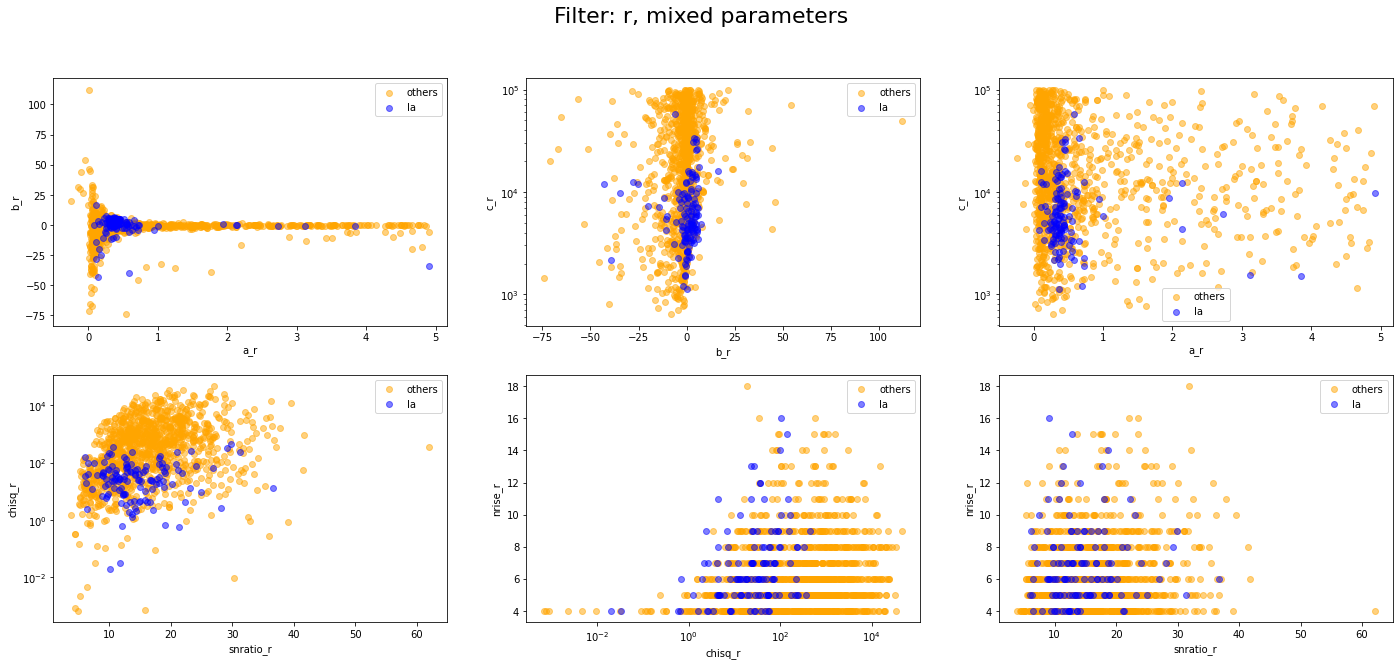

In [203]:
plt.figure(figsize=(24,10))
plt.suptitle('Filter: r, mixed parameters', fontsize=22)

plt.subplot(2,3,1)
plt.scatter(features2[flagx][~type_flagx]['a_r'], features2[flagx][~type_flagx]['b_r'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['a_r'], features2[flagx][type_flagx]['b_r'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('a_r')
plt.ylabel('b_r')
plt.legend()

plt.subplot(2,3,2)
plt.scatter(features2[flagx][~type_flagx]['b_r'], features2[flagx][~type_flagx]['c_r'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['b_r'], features2[flagx][type_flagx]['c_r'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('b_r')
plt.ylabel('c_r')
plt.legend()
plt.yscale('log')



plt.subplot(2,3,3)
plt.scatter(features2[flagx][~type_flagx]['a_r'], features2[flagx][~type_flagx]['c_r'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['a_r'], features2[flagx][type_flagx]['c_r'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('a_r')
plt.ylabel('c_r')
plt.legend()
plt.yscale('log')

plt.subplot(2,3,4)
plt.scatter(features2[flagx][~type_flagx]['snratio_r'], features2[flagx][~type_flagx]['chisq_r'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['snratio_r'], features2[flagx][type_flagx]['chisq_r'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('snratio_r')
plt.ylabel('chisq_r')
plt.legend()
plt.yscale('log')

plt.subplot(2,3,5)
plt.scatter(features2[flagx][~type_flagx]['chisq_r'], features2[flagx][~type_flagx]['nrise_r'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['chisq_r'], features2[flagx][type_flagx]['nrise_r'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('chisq_r')
plt.ylabel('nrise_r')
plt.legend()
plt.xscale('log')

plt.subplot(2,3,6)
plt.scatter(features2[flagx][~type_flagx]['snratio_r'], features2[flagx][~type_flagx]['nrise_r'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['snratio_r'], features2[flagx][type_flagx]['nrise_r'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('snratio_r')
plt.ylabel('nrise_r')
plt.legend()


plt.show()


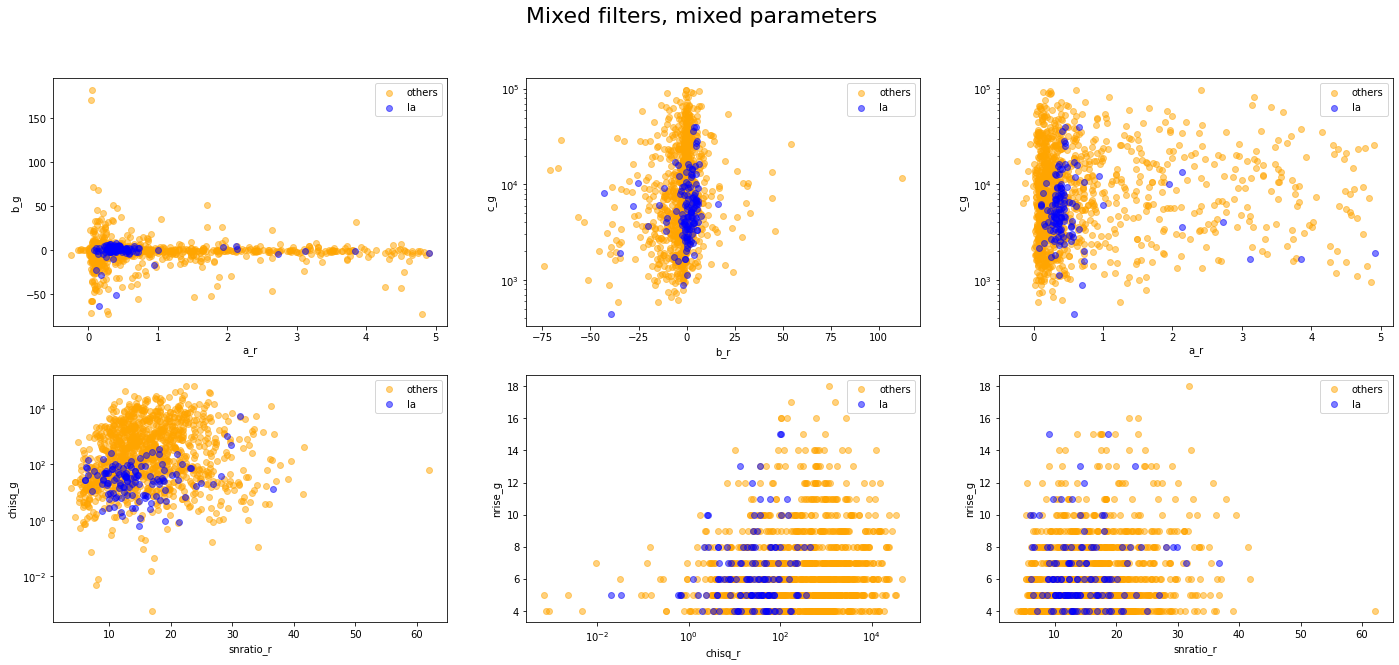

In [204]:
plt.figure(figsize=(24,10))
plt.suptitle('Mixed filters, mixed parameters', fontsize=22)

plt.subplot(2,3,1)
plt.scatter(features2[flagx][~type_flagx]['a_r'], features2[flagx][~type_flagx]['b_g'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['a_r'], features2[flagx][type_flagx]['b_g'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('a_r')
plt.ylabel('b_g')
plt.legend()

plt.subplot(2,3,2)
plt.scatter(features2[flagx][~type_flagx]['b_r'], features2[flagx][~type_flagx]['c_g'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['b_r'], features2[flagx][type_flagx]['c_g'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('b_r')
plt.ylabel('c_g')
plt.legend()
plt.yscale('log')



plt.subplot(2,3,3)
plt.scatter(features2[flagx][~type_flagx]['a_r'], features2[flagx][~type_flagx]['c_g'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['a_r'], features2[flagx][type_flagx]['c_g'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('a_r')
plt.ylabel('c_g')
plt.legend()
plt.yscale('log')

plt.subplot(2,3,4)
plt.scatter(features2[flagx][~type_flagx]['snratio_r'], features2[flagx][~type_flagx]['chisq_g'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['snratio_r'], features2[flagx][type_flagx]['chisq_g'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('snratio_r')
plt.ylabel('chisq_g')
plt.legend()
plt.yscale('log')

plt.subplot(2,3,5)
plt.scatter(features2[flagx][~type_flagx]['chisq_r'], features2[flagx][~type_flagx]['nrise_g'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['chisq_r'], features2[flagx][type_flagx]['nrise_g'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('chisq_r')
plt.ylabel('nrise_g')
plt.legend()
plt.xscale('log')

plt.subplot(2,3,6)
plt.scatter(features2[flagx][~type_flagx]['snratio_r'], features2[flagx][~type_flagx]['nrise_r'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['snratio_r'], features2[flagx][type_flagx]['nrise_g'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('snratio_r')
plt.ylabel('nrise_g')
plt.legend()


plt.show()


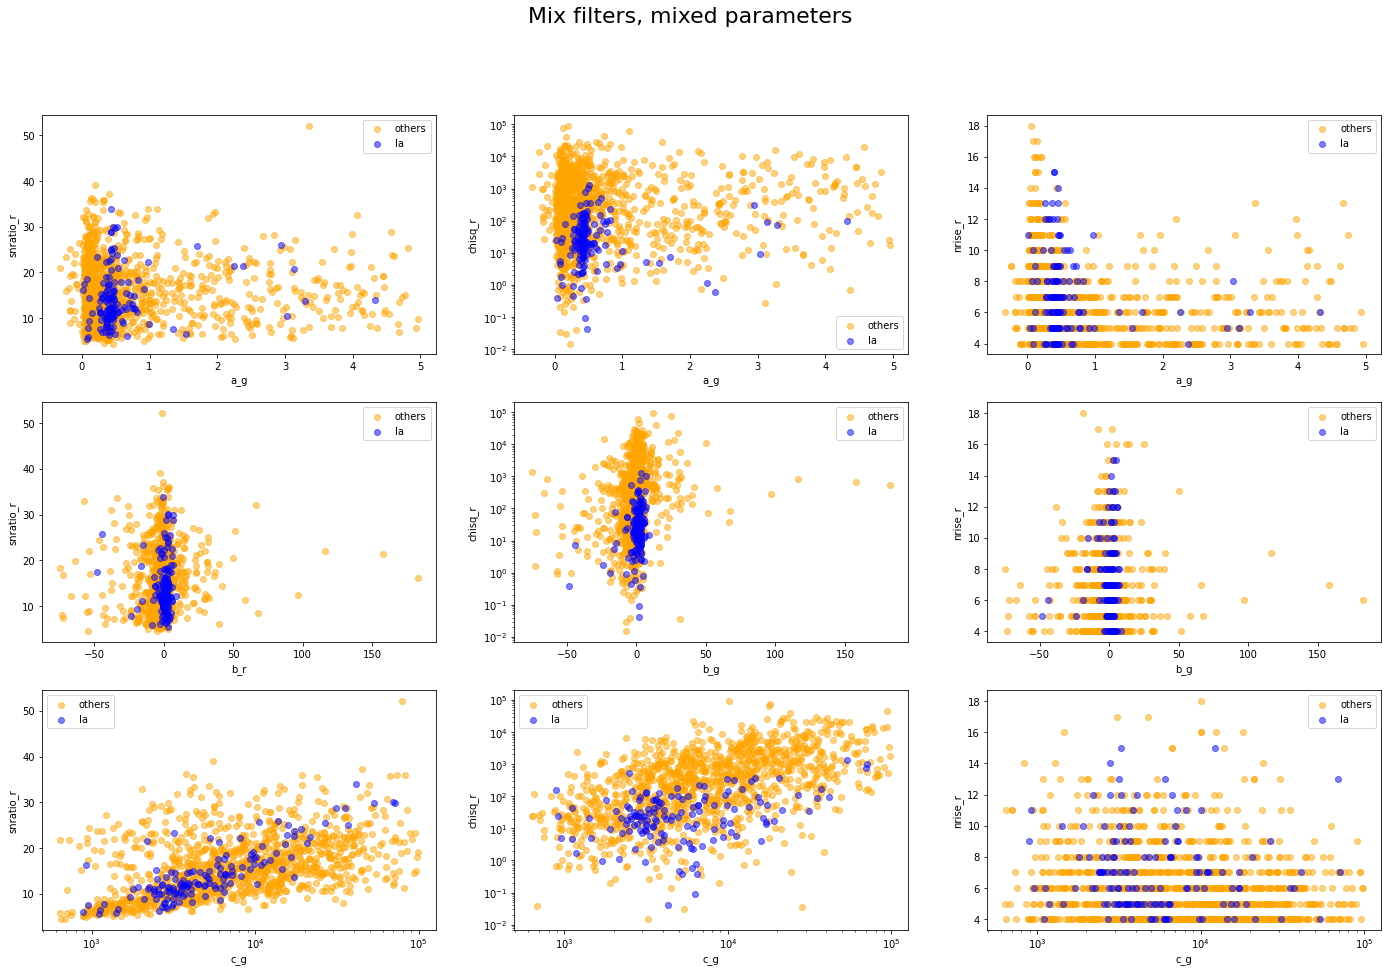

In [148]:
plt.figure(figsize=(24,15))
plt.suptitle('Mix filters, mixed parameters', fontsize=22)

plt.subplot(3,3,1)
plt.scatter(features2[flagx][~type_flagx]['a_g'], features2[flagx][~type_flagx]['snratio_r'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['a_g'], features2[flagx][type_flagx]['snratio_r'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('a_g')
plt.ylabel('snratio_r')
plt.legend()

plt.subplot(3,3,2)
plt.scatter(features2[flagx][~type_flagx]['a_g'], features2[flagx][~type_flagx]['chisq_r'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['a_g'], features2[flagx][type_flagx]['chisq_r'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('a_g')
plt.ylabel('chisq_r')
plt.legend()
plt.yscale('log')



plt.subplot(3,3,3)
plt.scatter(features2[flagx][~type_flagx]['a_g'], features2[flagx][~type_flagx]['nrise_r'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['a_g'], features2[flagx][type_flagx]['nrise_r'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('a_g')
plt.ylabel('nrise_r')
plt.legend()


plt.subplot(3,3,4)
plt.scatter(features2[flagx][~type_flagx]['b_g'], features2[flagx][~type_flagx]['snratio_r'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['b_g'], features2[flagx][type_flagx]['snratio_r'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('b_r')
plt.ylabel('snratio_r')
plt.legend()

plt.subplot(3,3,5)
plt.scatter(features2[flagx][~type_flagx]['b_g'], features2[flagx][~type_flagx]['chisq_r'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['b_g'], features2[flagx][type_flagx]['chisq_r'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('b_g')
plt.ylabel('chisq_r')
plt.legend()
plt.yscale('log')

plt.subplot(3,3,6)
plt.scatter(features2[flagx][~type_flagx]['b_g'], features2[flagx][~type_flagx]['nrise_r'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['b_g'], features2[flagx][type_flagx]['nrise_r'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('b_g')
plt.ylabel('nrise_r')
plt.legend()


plt.subplot(3,3,7)
plt.scatter(features2[flagx][~type_flagx]['c_g'], features2[flagx][~type_flagx]['snratio_r'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['c_g'], features2[flagx][type_flagx]['snratio_r'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('c_g')
plt.ylabel('snratio_r')
plt.legend()
plt.xscale('log')

plt.subplot(3,3,8)
plt.scatter(features2[flagx][~type_flagx]['c_g'], features2[flagx][~type_flagx]['chisq_r'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['c_g'], features2[flagx][type_flagx]['chisq_r'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('c_g')
plt.ylabel('chisq_r')
plt.legend()
plt.yscale('log')
plt.xscale('log')

plt.subplot(3,3,9)
plt.scatter(features2[flagx][~type_flagx]['c_g'], features2[flagx][~type_flagx]['nrise_r'], color='orange', alpha=0.5, label='others')
plt.scatter(features2[flagx][type_flagx]['c_g'], features2[flagx][type_flagx]['nrise_r'], color='blue', alpha=0.5, label='Ia')
plt.xlabel('c_g')
plt.ylabel('nrise_r')
plt.legend()
plt.xscale('log')

plt.show()

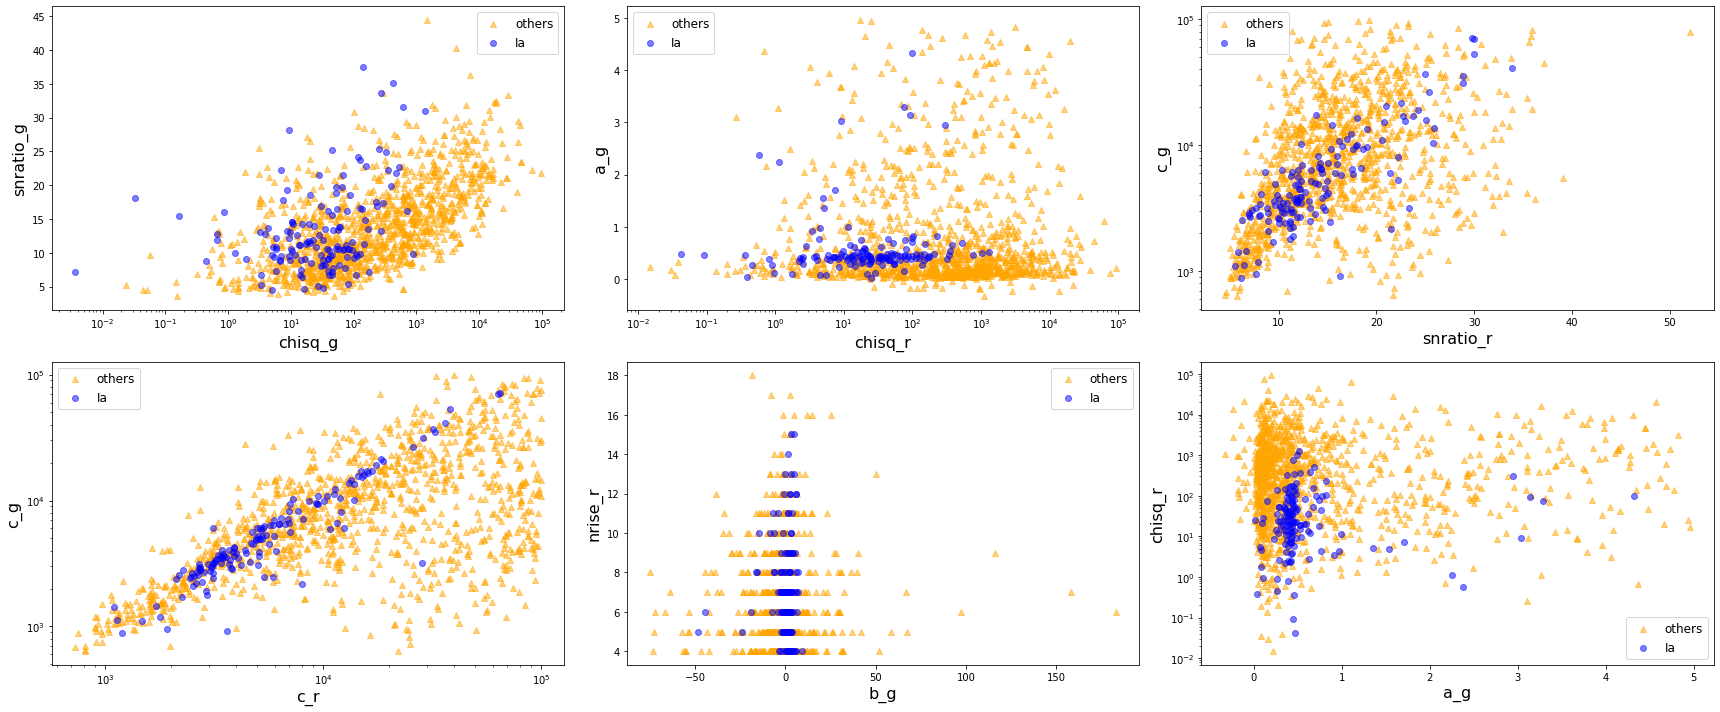

In [168]:
plt.figure(figsize=(24,10))

plt.subplot(2,3,1)
plt.scatter(features2[flagx][~type_flagx]['chisq_g'], features2[flagx][~type_flagx]['snratio_g'], color='orange', alpha=0.5, label='others', 
            marker='^')
plt.scatter(features2[flagx][type_flagx]['chisq_g'], features2[flagx][type_flagx]['snratio_g'], color='blue', alpha=0.5, label='Ia',
           marker='o')
plt.xlabel('chisq_g', fontsize=16)
plt.ylabel('snratio_g', fontsize=16)
plt.legend(fontsize=12)
plt.xscale('log')

plt.subplot(2,3,2)
plt.scatter(features2[flagx][~type_flagx]['chisq_r'], features2[flagx][~type_flagx]['a_g'], color='orange', alpha=0.5, label='others', 
            marker='^')
plt.scatter(features2[flagx][type_flagx]['chisq_r'], features2[flagx][type_flagx]['a_g'], color='blue', alpha=0.5, label='Ia',
           marker='o')
plt.xlabel('chisq_r', fontsize=16)
plt.ylabel('a_g', fontsize=16)
plt.legend(fontsize=12)
plt.xscale('log')

plt.subplot(2,3,3)
plt.scatter(features2[flagx][~type_flagx]['snratio_r'], features2[flagx][~type_flagx]['c_g'], color='orange', alpha=0.5, label='others', 
            marker='^')
plt.scatter(features2[flagx][type_flagx]['snratio_r'], features2[flagx][type_flagx]['c_g'], color='blue', alpha=0.5, label='Ia',
           marker='o')
plt.xlabel('snratio_r', fontsize=16)
plt.ylabel('c_g', fontsize=16)
plt.legend(fontsize=12)
plt.yscale('log')

plt.subplot(2,3,4)
plt.scatter(features2[flagx][~type_flagx]['c_r'], features2[flagx][~type_flagx]['c_g'], color='orange', alpha=0.5, label='others', 
            marker='^')
plt.scatter(features2[flagx][type_flagx]['c_r'], features2[flagx][type_flagx]['c_g'], color='blue', alpha=0.5, label='Ia',
           marker='o')
plt.xlabel('c_r', fontsize=16)
plt.ylabel('c_g', fontsize=16)
plt.legend(fontsize=12)
plt.xscale('log')
plt.yscale('log')

plt.subplot(2,3,5)
plt.scatter(features2[flagx][~type_flagx]['b_g'], features2[flagx][~type_flagx]['nrise_r'], color='orange', alpha=0.5, label='others', 
            marker='^')
plt.scatter(features2[flagx][type_flagx]['b_g'], features2[flagx][type_flagx]['nrise_r'], color='blue', alpha=0.5, label='Ia',
           marker='o')
plt.xlabel('b_g', fontsize=16)
plt.ylabel('nrise_r', fontsize=16)
plt.legend(fontsize=12)

plt.subplot(2,3,6)
plt.scatter(features2[flagx][~type_flagx]['a_g'], features2[flagx][~type_flagx]['chisq_r'], color='orange', alpha=0.5, label='others', 
            marker='^')
plt.scatter(features2[flagx][type_flagx]['a_g'], features2[flagx][type_flagx]['chisq_r'], color='blue', alpha=0.5, label='Ia',
           marker='o')
plt.xlabel('a_g', fontsize=16)
plt.ylabel('chisq_r', fontsize=16)
plt.legend(fontsize=12)
plt.yscale('log')

plt.tight_layout()
plt.savefig('plots/features.png')

# Read queried sample for UncSampling

In [77]:
dirname = 'results_42876/UncSampling/queries/'

flist = os.listdir(dirname)

tot = 0

queries = {}

for i in range(len(flist)):
    data = pd.read_csv(dirname + flist[i], delim_whitespace=True, skiprows=1, names = ['mute'] + list(features.keys()), index_col=False)
    data['big_class'] = None
    
    for j in range(data.shape[0]):
        data.loc[j, 'big_class'] = class_dict[data.iloc[j]['type']]
    
    types, freq = np.unique(data['big_class'].values, return_counts=True)
    
    tot = tot + data.shape[0]
    
    for j in range(len(types)):
        if types[j] in queries.keys():
            queries[types[j]].append(freq[j])
        else:
            queries[types[j]] = [freq[j]]

In [78]:
np.mean(queries['Ia'])

21.75

In [82]:
for i in range(len(queries.keys())):
    key = list(queries.keys())[i]
    print(key, '   ---   ',
          100*np.mean(queries[key])/60, ' -- ', 
          100*np.std(queries[key])/100)

Ia    ---    36.25  --  1.904599695474091
SN    ---    10.95  --  2.2550166296504335
galaxy    ---    17.083333333333332  --  2.940663190506523
multiple_object    ---    8.55  --  2.091195830141214
other_TNS    ---    2.2916666666666665  --  0.5636562191028618
star    ---    26.616666666666667  --  2.7219662011127186


# Read queried sample for Random Sampling

In [83]:
dirname2 = 'results_42876/RandomSampling/queries/'

flist2 = os.listdir(dirname2)

tot2 = 0

queries2 = {}

for i in range(len(flist2)):
    data2 = pd.read_csv(dirname2 + flist2[i], delim_whitespace=True, skiprows=1, names = ['mute'] + list(features.keys()))
    
    data2['big_class'] = None
    
    for j in range(data2.shape[0]):
        data2.loc[j, 'big_class'] = class_dict[data2.iloc[j]['type']]
        
    types2, freq2 = np.unique(data2['big_class'].values, return_counts=True)
    
    tot2 = tot2 + data2.shape[0]
    
    for j in range(len(types2)):
        if types2[j] in queries2.keys():
            queries2[types2[j]].append(freq2[j])
        else:
            queries2[types2[j]] = [freq2[j]]

In [84]:
tot2

6000

In [86]:
for i in range(len(queries2.keys())):
    key = list(queries2.keys())[i]
    print(key, '   ---   ',
          100*np.mean(queries2[key])/60, ' -- ', 
          100*np.std(queries2[key])/60)

Ia    ---    3.7689393939393936  --  1.8717449554213006
galaxy    ---    10.183333333333334  --  3.6201212379943546
multiple_object    ---    20.9  --  5.751424944210687
other_TNS    ---    2.017543859649123  --  0.8683767488255846
star    ---    63.63333333333333  --  6.567512635863156
SN    ---    2.777777777777778  --  1.5713484026367723


# Calculate contamination levels for RandomSampling

In [87]:
photo_Ia = {}
c = 0

for i in range(len(flist2)):
    dirname3 = 'results_42876/RandomSampling/class_prob/v' + str(i) + '/class_prob_RandomSampling__loop_59.csv'
    data3 = pd.read_csv(dirname3)
    
    flag = data3['prob_Ia'].values > 0.5
    data4 = data3[flag].copy()
    c = c + sum(flag)
    
    data4['big_class'] = [class_dict[data4.iloc[j]['type']] for j in range(data4.shape[0])]
    
    
    types, freq = np.unique(data4['big_class'].values, return_counts=True)
    photo_Ia[i] = pd.DataFrame({'type': types, 'n': freq, 'perc': 100 * freq/data4.shape[0]})


In [90]:
c

88654

In [91]:
c/len(flist2)/42806

0.02071064803999439

In [57]:
n_list = {}

for key in big_class.keys():
    
    n_list[key] = [photo_Ia[i]['perc'][photo_Ia[i]['type'] == key].values[0] if len(photo_Ia[i]['n'][photo_Ia[i]['type'] == key].values) > 0 else 0 for i in range(100)]
    

In [58]:
for key in n_list.keys():
    print(key, '   ---   ', np.mean(n_list[key]), '   ---  ', np.std(n_list[key]) )

multiple_object    ---    3.6881625221670173    ---   4.124331162145951
star    ---    7.965411189916458    ---   6.654992752418313
galaxy    ---    35.96571402982489    ---   19.340919607373706
SN    ---    10.96228113339906    ---   4.694091628788143
other_TNS    ---    0.3594393232566451    ---   0.3508311099936844
Ia    ---    41.05899180143593    ---   21.977277295655796


# Calculate contamination levels for UncSampling

In [92]:
photo_Ia = {}
c = 0
for i in range(len(flist2)):
    dirname3 = 'results_42876/UncSampling/class_prob/v' + str(i) + '/class_prob_UncSampling__loop_59.csv'
    data3 = pd.read_csv(dirname3)
    
    flag = data3['prob_Ia'].values > 0.5
    data4 = data3[flag].copy()
    
    c = c + sum(flag)
    
    data4['big_class'] = [class_dict[data4.iloc[j]['type']] for j in range(data4.shape[0])]
    
    types, freq = np.unique(data4['big_class'].values, return_counts=True)
    photo_Ia[i] = pd.DataFrame({'type': types, 'n': freq, 'perc': 100 * freq/data4.shape[0]})

In [96]:
c

87552

In [73]:
big_types = np.unique(list(class_dict.values()))

n_list = {}

for key in big_types:
    
    n_list[key] = [photo_Ia[i]['perc'][photo_Ia[i]['type'] == key].values[0] if len(photo_Ia[i]['n'][photo_Ia[i]['type'] == key].values) > 0 else 0 for i in range(100)]
    

In [74]:
for key in n_list.keys():
    print(key, '   ---   ', np.mean(n_list[key]), '   ---  ', np.std(n_list[key]) )

Ia    ---    82.46299109027292    ---   5.5528955974850875
SN    ---    8.489785028807358    ---   1.415301479793636
galaxy    ---    1.9596612241373454    ---   1.6721552998429299
multiple_object    ---    1.803663858199956    ---   1.1364014454023637
other_TNS    ---    0.3356911807476653    ---   0.13294439854296256
star    ---    4.948207617834758    ---   3.515842197148517
